In [72]:
import matplotlib
#matplotlib.use('Agg') # necessary for linux kernal
%matplotlib inline
import matplotlib.pyplot as plt

import cv2

In [73]:
img = cv2.imread(r'FTest1_input_inv_out_bw.png')


kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))
 
img= cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


binary = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)
_, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

approx = [cv2.approxPolyDP(cnt,1,True) for cnt in contours]
cv2.drawContours(img, approx, -1, (0,0,255), 1) 
cv2.imwrite("mask.png", img)

True

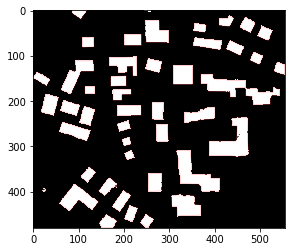

In [74]:
import numpy as np
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


img = cv2.imread(r'FTest1_input_inv_out_bw.png')
plt.imshow(img)


patches = []
for cnt in approx:
    #cnt = np.float32(cnt)
    
    if len(cnt) > 3:
    
        polygon = Polygon(cnt.reshape((len(cnt),2)), True, edgecolor='r')
        patches.append(polygon)
    

p = PatchCollection(patches, alpha=0.4, facecolor="white", edgecolor="red", lw = 0.5)
ax.add_collection(p)

#plt.show()
plt.savefig('fig_cat.png', dpi=600)